Dataset Overview:
Total number of investments: 5300
Number of unique users: 1000
Number of unique investment baskets: 145


Basket Investment Distribution:
                              Total Investment ($)  Number of Investments  \
basket_name                                                                 
Global utilities                        6248708.85                    407   
Basic materials World                   4777265.25                    406   
Growth Rockets                          2629356.58                    263   
Renewable energy world ALL              2513225.85                    285   
Technology stars of value               2360984.10                    197   
...                                            ...                    ...   
US airlines                                3757.00                      1   
Strong value growth Europe                 3316.00                      1   
Healtcare Europe top valuers               3030.00                      1 

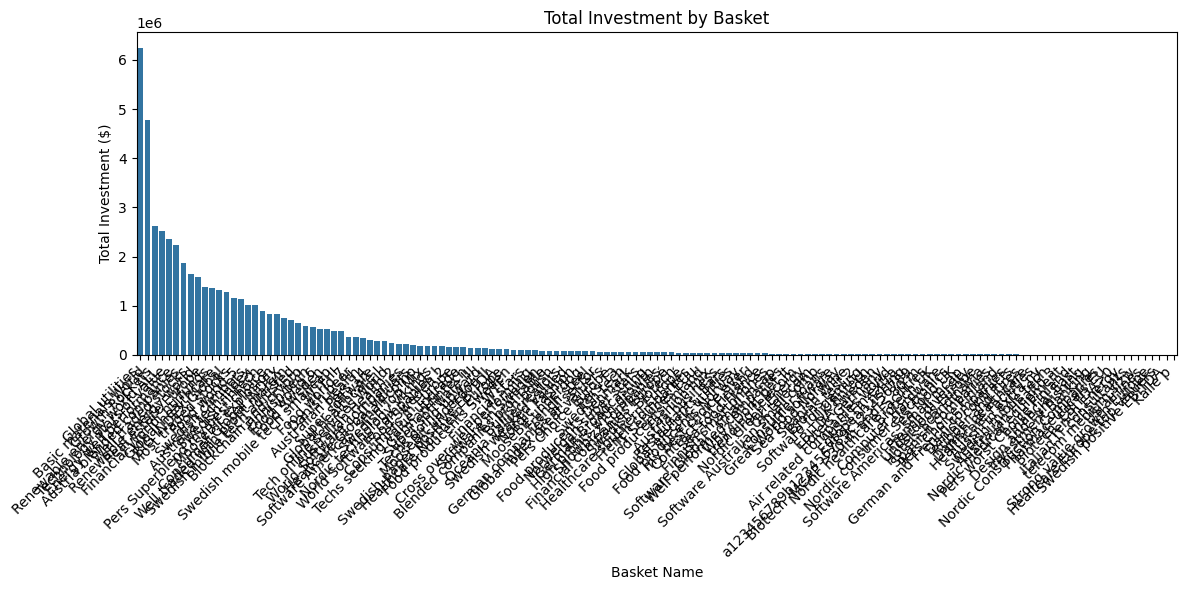

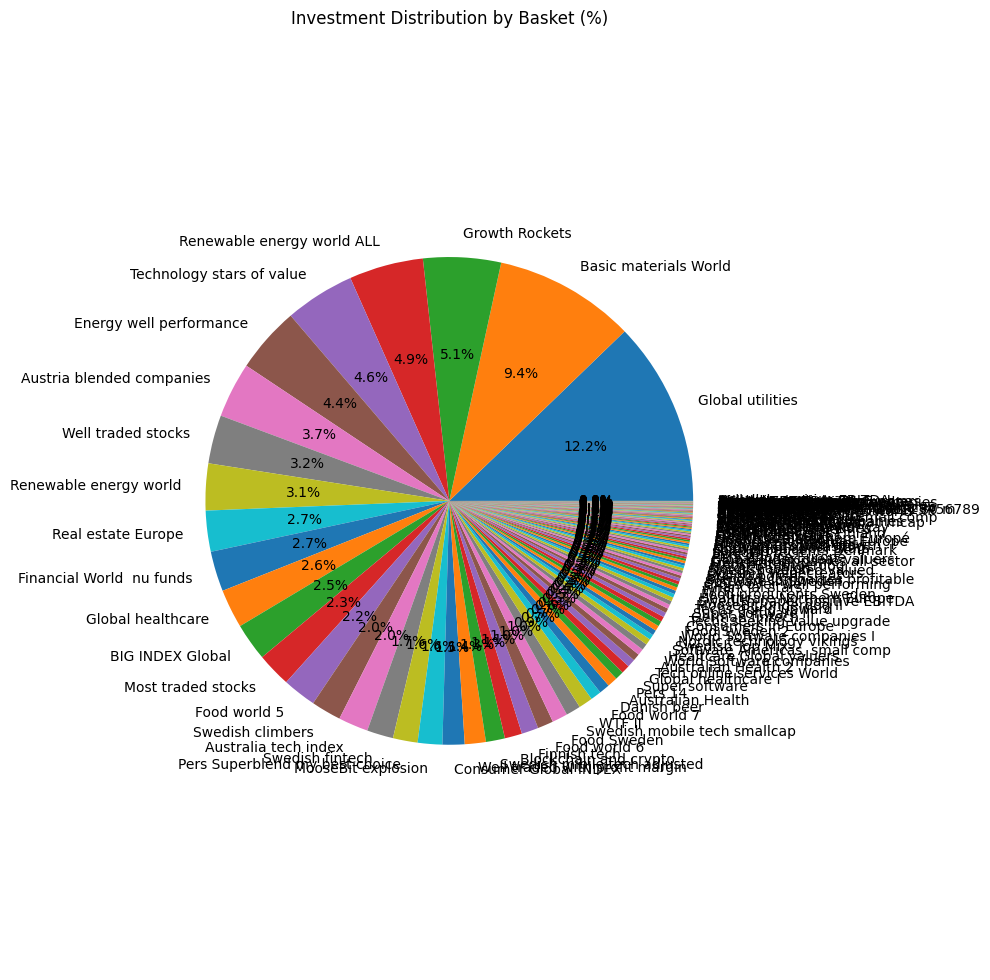

Investment by User:
user_id
1761    156740.0
1997    156740.0
1063    156740.0
1371    155470.0
1520    144180.0
          ...   
1106     10760.0
1543     10760.0
1989     10760.0
1241      7880.0
1307      6456.0
Name: investment_amount, Length: 1000, dtype: float64




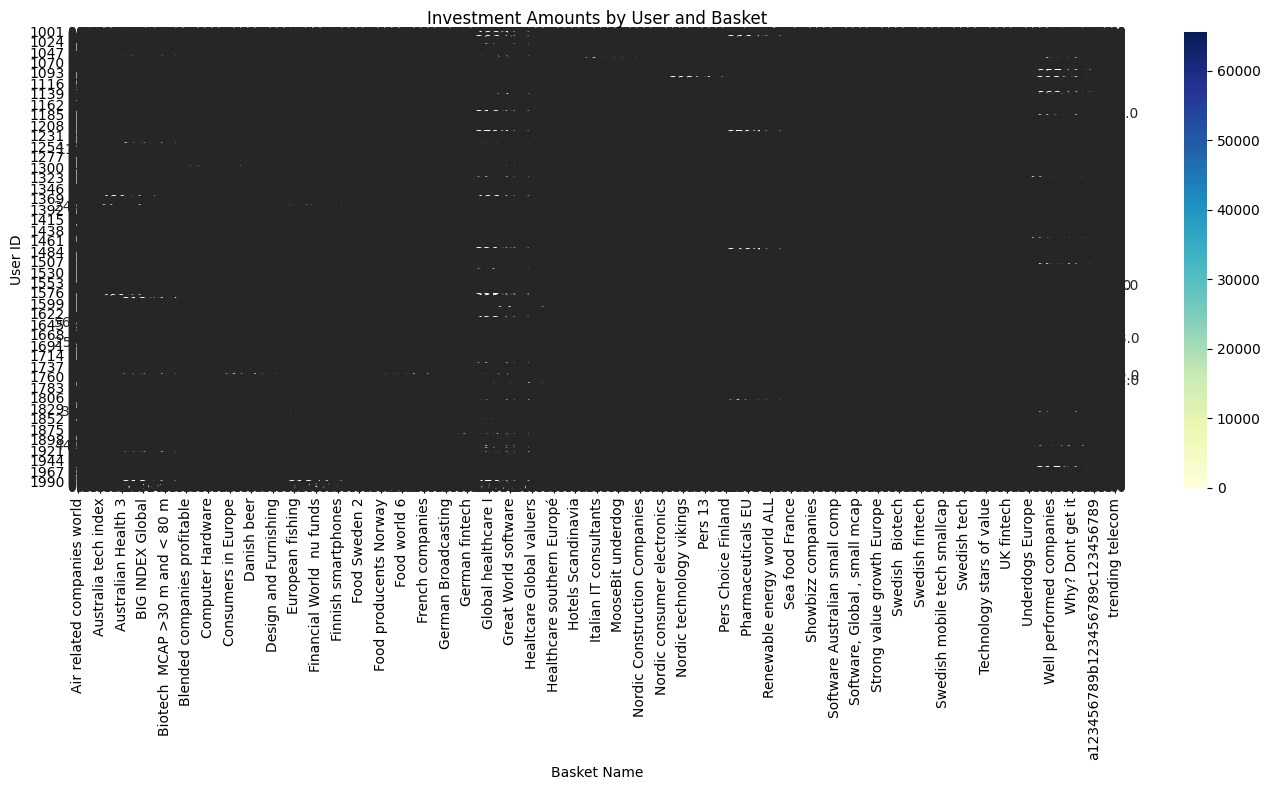

Number of different baskets per user:
user_id
1001    5
1002    5
1003    5
1004    5
1005    7
       ..
1996    5
1997    5
1998    6
1999    7
2000    4
Name: basket_name, Length: 1000, dtype: int64


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
# Note: Since your CSV uses semicolons as separators, we'll specify that
df = pd.read_csv('syntheticDataGenerators/investment/invest_data.csv', sep=';')

# Display basic information about the dataset
print("Dataset Overview:")
print(f"Total number of investments: {len(df)}")
print(f"Number of unique users: {df['user_id'].nunique()}")
print(f"Number of unique investment baskets: {df['basket_name'].nunique()}")
print("\n")

# Analyze basket distribution
basket_distribution = df.groupby('basket_name')['investment_amount'].agg(['sum', 'count', 'mean'])
basket_distribution = basket_distribution.sort_values('sum', ascending=False)
basket_distribution.columns = ['Total Investment ($)', 'Number of Investments', 'Average Investment ($)']

print("Basket Investment Distribution:")
print(basket_distribution)
print("\n")

# Calculate percentage distribution
total_investment = df['investment_amount'].sum()
basket_pct = (basket_distribution['Total Investment ($)'] / total_investment * 100).round(2)
basket_distribution['Percentage (%)'] = basket_pct

# Visualize the distribution with bar charts
plt.figure(figsize=(12, 6))
sns.barplot(x=basket_distribution.index, y=basket_distribution['Total Investment ($)'])
plt.title('Total Investment by Basket')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Investment ($)')
plt.xlabel('Basket Name')
plt.tight_layout()
plt.show()

# Pie chart for percentage distribution
plt.figure(figsize=(10, 10))
plt.pie(basket_distribution['Total Investment ($)'], labels=basket_distribution.index, autopct='%1.1f%%')
plt.title('Investment Distribution by Basket (%)')
plt.axis('equal')
plt.tight_layout()
plt.show()

# User-level analysis
user_investments = df.groupby('user_id')['investment_amount'].sum().sort_values(ascending=False)
print("Investment by User:")
print(user_investments)
print("\n")

# Heatmap of user-basket investments
pivot_table = df.pivot_table(
    values='investment_amount',
    index='user_id',
    columns='basket_name',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Investment Amounts by User and Basket')
plt.ylabel('User ID')
plt.xlabel('Basket Name')
plt.tight_layout()
plt.show()

# Calculate diversity of investments per user
user_diversity = df.groupby('user_id')['basket_name'].nunique()
print("Number of different baskets per user:")
print(user_diversity)